<center><H1> Mini Project  - Text Mining </H1></center><br/>
<center><H1> Student Id: 2021AIML064 </H1></center><br/>
<center><H1> Student Name:Jagadish Yalla </H1></center><br/>

Mini-Project (24 Marks)

NOTE:

1) ALL  THE QUESTIONS ARE MANDATORY

2) You can use the Library and Frameworks wherever required except for TF-IDF as you have to implement TF-IDF from scratch.

3) Merge all your problems into a single python Notebook and Upload a Single Python notebook for all your problems.

4) Solution to the problems should be separate and placed one after the other in the final submission Notebook.

5) Do not submit Zip files.

6) No deadline extension would be entertained. We are very strict on this from now. We really appreciate you to start working on the miniproject from Day - 1 so as to prevent any last minute occlusions ( Health / office work or any other )

You can use the following references for completing the assignment.

1) https://medium.com/analytics-vidhya/part-of-speech-and-viterbi-algorithm-11138ef0c63d (Links to an external site.)

2) https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 (Links to an external site.)

3) https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460 (Links to an external site.)

 

Dataset: stories.zip  Download stories.zip 

The dataset has several small stories in text file. Consider each story as separate document.

**Term - Frequency Inverse Document Frequency ** 

 

1) Remove Stopwords (1 Mark)

2) Remove the punctuations. the special characters and convert the text to lower case.        (2 Mark)

3) create bigrams for the entire dataset and list down 10 most frequent bigrams. ( 2 Marks )

4) You have to implement TF-IDF the Algorithm from scratch.   ( 4 Mark )

5) Use the above-implemented algorithm and the values to calculate TF-IDF (using TF IDF formula) on the preprocessed data for unigrams and list down the top 10 words which have the highest TF-IDF Value. (2 Marks)

 

Refer to the following link to create POS labeled data: https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/

 

Perform Part of Speech Tagging using the Viterbi Algorithm, 

6) Label the cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 )   ( 2 Mark )

7) Split the Train and the Test Dataset                      (1 Mark)

8) Implement the Viterbi Algorithm ( you can use Library) to get the Part of Speech Tagging.        ( 3 Marks)

9) Calculate the Accuracy and F1 score. ( Number of Predicted Correct Tag in the test set / Total number of Data points in the test set)   (2 Marks)

   Topic Modelling        

Use cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 ) 

10) Using the LDA algorithm create the Topics (10) for the Corpus             (3 Marks)

11) List down the 10 words in each of the Topics Extracted.           (2 Marks)

Note: You may ignore if you find the words in the topic are not highly related.

 

For any doubts and queries, you can write me on: chinesh.doshi@wilp.bits-pilani.ac.in

## Import libraries

In [42]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words
from tabulate import tabulate
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.util import trigrams

from math import log
from matplotlib import pyplot as plt

from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

import seaborn as sns
import string
import sys
import nltk
import os
import itertools
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math
#nltk.download('punkt')
#nltk.download('stopwords')
# %load_ext autotime

In [3]:
# Read files from current work directory
basedir=os.getcwd()
print('Roor Folder:',basedir)
os.chdir(basedir+'/stories')
print('Stories Folder:',os.chdir(basedir+'/stories'))

Roor Folder: C:\Users\JAGADISH\Desktop\BITS AIML\Jagadish\TextMining\Assignments\MiniProject
Stories Folder: None


In [4]:
dir_list = os.listdir(os.getcwd())
dir_list

['13chil.txt',
 '3gables.txt',
 '3lpigs.txt',
 '3sonnets.vrs',
 '3student.txt',
 '3wishes.txt',
 '4moons.txt',
 '5orange.txt',
 '6ablemen.txt',
 '6napolen.txt',
 '7oldsamr.txt',
 '7voysinb.txt']

In [5]:
for file in dir_list:
    if(not(file.endswith('.txt'))):
        pre, ext = os.path.splitext(file)
        os.rename(file, pre + '.txt')


In [6]:
dir_list = os.listdir(os.getcwd())
dir_list

['13chil.txt',
 '3gables.txt',
 '3lpigs.txt',
 '3sonnets.txt',
 '3student.txt',
 '3wishes.txt',
 '4moons.txt',
 '5orange.txt',
 '6ablemen.txt',
 '6napolen.txt',
 '7oldsamr.txt',
 '7voysinb.txt']

In [7]:
corpus = []
for file_path in dir_list:
    with open(file_path) as f_input:
        corpus.append(f_input.read())

print('Total Stories: ', len(corpus),'\n\n')
print(corpus)

Total Stories:  12 


['                                FOR CHILDREN:\n\n                                   Sly Fox\n\n    Mr. Rabbit sat on his front porch rocking, eating a great big carrot, \nand looking.\n\n    "Looks like Sly Fox coming down the road," he said to himself, walking \nto the end of the porch. Shading his eyes with his paws, he exclaimed, "It \nis Sly Fox." \n\n    "Good morning Mr. Rabbit," cried Sly Fox, as he walked across the yard. \n"Good morning," replied Mr. Rabbit, a slight frown on his face. \n\n    "Well," said Sly Fox, "as I haven\'t seen you in so long a time, thought \nI would stop and chat a while." \n\n    Mr. Rabbit could not be rude in his own home, even to an enemy, so he \noffered Sly Fox a seat on the porch. \n\n    "Take a chair," he said politely. \tBut Sly Fox did not stay long, and as \nhe was leaving, he asked: "Mr. Rabbit, my mother is having a good dinner \ntonight. Won\'t you, Mrs. Rabbit, and your three little rabs come to dinner \nwith me

In [8]:
# Read first doc from corpus
corpus[0]

'                                FOR CHILDREN:\n\n                                   Sly Fox\n\n    Mr. Rabbit sat on his front porch rocking, eating a great big carrot, \nand looking.\n\n    "Looks like Sly Fox coming down the road," he said to himself, walking \nto the end of the porch. Shading his eyes with his paws, he exclaimed, "It \nis Sly Fox." \n\n    "Good morning Mr. Rabbit," cried Sly Fox, as he walked across the yard. \n"Good morning," replied Mr. Rabbit, a slight frown on his face. \n\n    "Well," said Sly Fox, "as I haven\'t seen you in so long a time, thought \nI would stop and chat a while." \n\n    Mr. Rabbit could not be rude in his own home, even to an enemy, so he \noffered Sly Fox a seat on the porch. \n\n    "Take a chair," he said politely. \tBut Sly Fox did not stay long, and as \nhe was leaving, he asked: "Mr. Rabbit, my mother is having a good dinner \ntonight. Won\'t you, Mrs. Rabbit, and your three little rabs come to dinner \nwith me?" \n\n    Oh, thought 

In [9]:
# inspect/check the split chapters for correctness
print ( np.array ( ["Document " + str(i) + " " + corpus[i][:50] + "..." for i in range(12)] ) )

['Document 0                                 FOR CHILDREN:\n\n   ...'
 'Document 1 :.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:....'
 'Document 2                   THE THREE LITTLE PIGS\n\n   Once u...'
 'Document 3 \nDate:  03-09-89  20:46\nFrom:  Staeorra Rokraven\n\n...'
 'Document 4 :.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:....'
 'Document 5                      THE THREE WISHES\n\n   Once upo...'
 'Document 6                        Four Moons of Death\n\n      ...'
 'Document 7 :.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:....'
 'Document 8                                SIX ABLE MEN  \n\n   ...'
 'Document 9 :.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:....'
 'Document 10                          THE SEVEN OLD SAMURAI\n\n  ...'
 'Document 11                   THE SEVEN VOYAGES OF SINBAD THE ...']



##  PART 1: **Term - Frequency Inverse Document Frequency** 

### **1. Remove Stopwords (1 Mark)** <a class="anchor" id="2.1"></a>

In [10]:
stop = stopwords.words('english')
stop.extend(['The', 'A'])

In [11]:
def remove_stopwords ( text ):
    return ' '.join([w for w in word_tokenize(text) if ( ( w.lower() not in stop ) and ( w.isalpha() == True )  )]) + ' '

In [12]:
totaldocs=len(corpus)  
totaldocs

12

In [13]:
# lets remove the stop words and then inspect the same
for i in range (totaldocs): corpus[i] = remove_stopwords(corpus[i])
print ( np.array ( ["Document " + str(i) + " " + corpus[i][:50] + "..." for i in range(totaldocs)] ) )

['Document 0 CHILDREN Sly Fox Rabbit sat front porch rocking ea...'
 'Document 1 BBS text file junkies RPGNet GM File Archive Site ...'
 'Document 2 THREE LITTLE PIGS upon time three little pigs left...'
 'Document 3 Date Staeorra Rokraven CLOUD SCULPTORS air finds f...'
 'Document 4 BBS text file junkies RPGNet GM File Archive Site ...'
 'Document 5 THREE WISHES upon time woodcutter lived happily wi...'
 'Document 6 Four Moons Death DING DONG melancholy tintinabulat...'
 'Document 7 BBS text file junkies RPGNet GM File Archive Site ...'
 'Document 8 SIX ABLE MEN upon time lived young soldier named M...'
 'Document 9 BBS text file junkies RPGNet GM File Archive Site ...'
 'Document 10 SEVEN OLD SAMURAI upon time far Japan band fierce ...'
 'Document 11 SEVEN VOYAGES SINBAD SAILOR upon time years years ...']


### 2) Remove the punctuations. the special characters and convert the text to lower case.        (2 Mark)

In [14]:
# in addition to chars in string.punctuation, we see some special characters in the input text like ”, “, ’
# lets add them to the string.punctuation list
string.punctuation = string.punctuation + '”“’'

def remove_punctuations ( text ):
    nopunc = [char for char in text if char not in string.punctuation] # Check characters to see if they are in punctuation
    nopunc = ''.join(nopunc) # Join the characters again to form the string.
    return nopunc

In [15]:
# lets remove the punctuations and special chars and then inspect the same
for i in range (totaldocs): corpus[i] = remove_punctuations(corpus[i])
print ( np.array ( ["Document " + str(i) + " " + corpus[i][:50] + "..." for i in range(totaldocs)] ) )

['Document 0 CHILDREN Sly Fox Rabbit sat front porch rocking ea...'
 'Document 1 BBS text file junkies RPGNet GM File Archive Site ...'
 'Document 2 THREE LITTLE PIGS upon time three little pigs left...'
 'Document 3 Date Staeorra Rokraven CLOUD SCULPTORS air finds f...'
 'Document 4 BBS text file junkies RPGNet GM File Archive Site ...'
 'Document 5 THREE WISHES upon time woodcutter lived happily wi...'
 'Document 6 Four Moons Death DING DONG melancholy tintinabulat...'
 'Document 7 BBS text file junkies RPGNet GM File Archive Site ...'
 'Document 8 SIX ABLE MEN upon time lived young soldier named M...'
 'Document 9 BBS text file junkies RPGNet GM File Archive Site ...'
 'Document 10 SEVEN OLD SAMURAI upon time far Japan band fierce ...'
 'Document 11 SEVEN VOYAGES SINBAD SAILOR upon time years years ...']


In [16]:
# lets convert all text in all chapters to lower case and inspect the same
for i in range (totaldocs): corpus[i] = "Document " + str(i)+" "+corpus[i].lower()
print ( np.array ( [corpus[i][:50] + "..." for i in range(totaldocs)] ) )

['Document 0 children sly fox rabbit sat front porch...'
 'Document 1 bbs text file junkies rpgnet gm file ar...'
 'Document 2 three little pigs upon time three littl...'
 'Document 3 date staeorra rokraven cloud sculptors ...'
 'Document 4 bbs text file junkies rpgnet gm file ar...'
 'Document 5 three wishes upon time woodcutter lived...'
 'Document 6 four moons death ding dong melancholy t...'
 'Document 7 bbs text file junkies rpgnet gm file ar...'
 'Document 8 six able men upon time lived young sold...'
 'Document 9 bbs text file junkies rpgnet gm file ar...'
 'Document 10 seven old samurai upon time far japan ...'
 'Document 11 seven voyages sinbad sailor upon time ...']


In [17]:
# Let's store the tokenized documents too for ready usage later on
tokenized_docs = [""] * totaldocs

for i in range (totaldocs): tokenized_docs[i] = word_tokenize(corpus[i])

# Let's store the complete dataset/text and the tokenized version of it too
text = ' '.join([corpus[i] for i in range(totaldocs)])
tokenized_text = word_tokenize(text)

In [18]:
#tokenized_text
#tokenized_docs

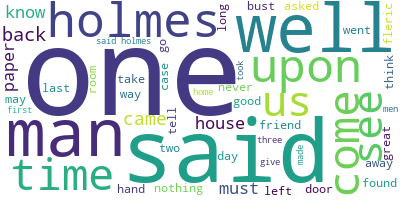

In [19]:
# lets display the word frequency cloud to visualize the most frequent words
WordCloud(background_color="white", max_words=50).generate(text).to_image()

## 3) create bigrams for the entire dataset and list down 10 most frequent bigrams. ( 2 Marks )

In [20]:
# Per instructions, here's a list of bigrams in the ENTIRE DATASET i.e stop words not removed, only punctuations removed...
Counter(list(bigrams(word_tokenize(remove_punctuations(text).lower())))).most_common(10)

[(('said', 'holmes'), 42),
 (('sly', 'fox'), 26),
 (('sherlock', 'holmes'), 24),
 (('one', 'day'), 18),
 (('sinbad', 'sailor'), 18),
 (('masser', 'holmes'), 16),
 (('let', 'us'), 16),
 (('yes', 'sir'), 14),
 (('little', 'pig'), 13),
 (('could', 'see'), 12)]

<AxesSubplot:>

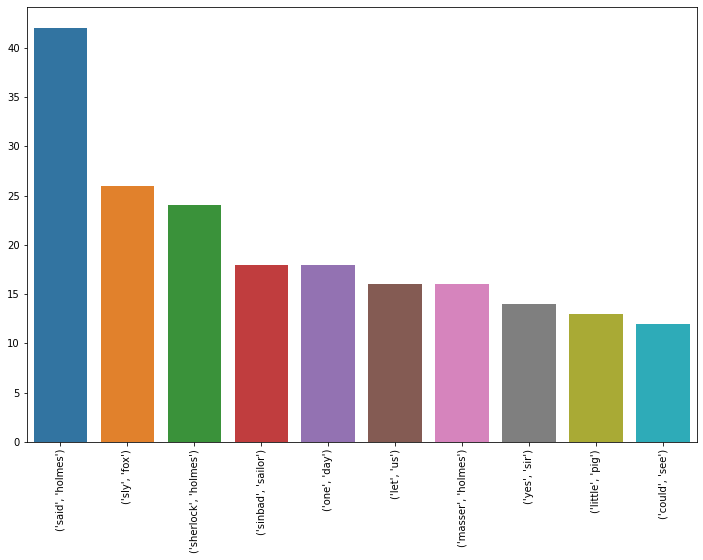

In [21]:
# Let's visually see this; this time we will use pd.Series to calculate the bigrams
bigrams_series = (pd.Series(bigrams(word_tokenize(remove_punctuations(text).lower()))).value_counts())[:10]
bigrams_series.sort_values(ascending=False).plot.bar(width=0.75, figsize=(12, 8))
sns.barplot(x=bigrams_series.index, y=bigrams_series)

## 4) You have to implement TF-IDF the Algorithm from scratch.   ( 4 Mark )

In [22]:
document_names = ['Document 0','Document 1','Document 2','Document 3','Document 4','Document 5','Document 6','Document 7','Document 8','Document 9','Document 10','Document 11']

In [23]:
def getTFIDFVector (corpus, doc_names, docs):

    try:

        # initialize the list called tf_idf_vector which will be returned by this function
        tf_idf_vector=[]

        # convert the entire corpus to lower case
        corpus = corpus.lower()

        # tokenize and store the corpus
        tokenized_corpus = word_tokenize(corpus)

        # calculate total docs in corpus
        total_docs_in_corpus = len(doc_names)

        # calculate total words in corpus
        total_words_in_corpus = len(tokenized_corpus)
        
        # Lets create a list of unique words and the # of times they occur
        # in the corpus as a tuple
        tf1 = sorted(Counter(tokenized_corpus).items(), key=lambda pair: pair[0])
        total_unique_words_in_corpus = len(tf1)

        # lets build a unique list of words in the entire corpus
        word_list = []
        for word_id in range (0, total_unique_words_in_corpus):
            word_list.append(tf1[word_id][0])

        # lets build a dataframe that will contain all unique words as columns
        # One row per document will be there in this dataframe, containing the TF
        df = pd.DataFrame(0.0, columns=word_list, index=doc_names)

        # initialize the entire dataframe to zeros
        for doc_id in range (0, total_docs_in_corpus):
            for word_id in range (0, total_unique_words_in_corpus ):
                df.at[doc_names[doc_id], word_list[word_id]] = 0.0;

        for doc_id in range (0, total_docs_in_corpus):
            tokenized_doc = word_tokenize(docs[doc_id].lower())
            total_words_in_doc = len(tokenized_doc)
            tf2 = sorted(Counter(tokenized_doc).items(), key=lambda pair: pair[0])
            total_unique_words_in_doc = len(tf2)

            # calculate and update Term Freqeuncy of all words (columns)
            # tf(t,d) = count of t in d / number of words in d
            for word_id in range (0, total_unique_words_in_doc):
                df.at[doc_names[doc_id], tf2[word_id][0]] = tf2[word_id][1] / total_words_in_doc

        # next calculate and update Inverse Document Freqeuncy of all words (columns)
        # we also smooth out the idf values, to avoid term become completely 0
        # idf(t) = 1 + log(N/ 1 + df(t))
        # finally we calculate and store TF*IDF 
        for doc_id in range (0, total_docs_in_corpus):
            for word_id in range (0, total_unique_words_in_corpus):
                idf = 1 + ( log( total_docs_in_corpus / ( ( df[tf1[word_id][0]] > 0 ).sum() + 1 ) ) )
                tf_idf_vector.append( ( tf1[word_id][0], ( df.at[doc_names[doc_id], tf1[word_id][0]] * idf  ) ) )
                
    except:
        # in case of runtime exceptions we will detect it here gracefully
        print("Oops!", sys.exc_info()[0], "occurred.")
        print()

    else:
        print("TF-IDF Vector successfully constructed!")
        
    finally:
        return tf_idf_vector

## 5) Use the above-implemented algorithm and the values to calculate TF-IDF (using TF IDF formula) on the preprocessed data for unigrams and list down the top 10 words which have the highest TF-IDF Value. (2 Marks)

In [24]:
# lets invoke our customer method to get the TF-IDF vector
tf_idf_vector = getTFIDFVector(text, document_names, corpus)

TF-IDF Vector successfully constructed!


In [25]:
# lets display the top 10 words with the highest TF-IDF values
sorted(tf_idf_vector, key=lambda pair: pair[1], reverse=True)[0:10]

[('rabbit', 0.11826452180298563),
 ('woodcutter', 0.11697316211849391),
 ('fox', 0.10751320163907786),
 ('fleric', 0.08694060630814011),
 ('sly', 0.07964525467152395),
 ('pig', 0.07892413256622206),
 ('sausages', 0.07798210807899594),
 ('wife', 0.07334235285741508),
 ('raiko', 0.06781601949541834),
 ('robbers', 0.06781601949541834)]

# Part2 : Perform Part of Speech Tagging using the Viterbi Algorithm

### 6) Label the cleaned Tf-IDF dataset ( obtained after performing step 1 and step 2 ) ( 2 Mark )

In [26]:
# Lets label the dataset (i.e. words tagged with their respective Parts of Speech (POS))
tagged_documents = [""] * totaldocs
word_count = 0
for i in range (totaldocs):
    tagged_documents[i] = nltk.pos_tag(tokenized_docs[i])
    word_count = word_count + len(tagged_documents[i])

In [27]:
tagged_documents_ = []
for s in tagged_documents:
    s.insert(0,('##','##'))
    s.append(('&&','&&'))
    tagged_documents_.append(s)

In [28]:
# Lets display the tagged words
tagged_documents_

[[('##', '##'),
  ('Document', 'NN'),
  ('0', 'CD'),
  ('children', 'NNS'),
  ('sly', 'RB'),
  ('fox', 'VBP'),
  ('rabbit', 'NN'),
  ('sat', 'JJ'),
  ('front', 'NN'),
  ('porch', 'NN'),
  ('rocking', 'VBG'),
  ('eating', 'VBG'),
  ('great', 'JJ'),
  ('big', 'JJ'),
  ('carrot', 'NN'),
  ('looking', 'VBG'),
  ('looks', 'NNS'),
  ('like', 'IN'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('coming', 'VBG'),
  ('road', 'NN'),
  ('said', 'VBD'),
  ('walking', 'JJ'),
  ('end', 'NN'),
  ('porch', 'NN'),
  ('shading', 'VBG'),
  ('eyes', 'NNS'),
  ('paws', 'NNS'),
  ('exclaimed', 'VBD'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('good', 'JJ'),
  ('morning', 'NN'),
  ('rabbit', 'NN'),
  ('cried', 'VBD'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('walked', 'VBN'),
  ('across', 'IN'),
  ('yard', 'RB'),
  ('good', 'JJ'),
  ('morning', 'NN'),
  ('replied', 'VBD'),
  ('rabbit', 'NN'),
  ('slight', 'JJ'),
  ('frown', 'JJ'),
  ('face', 'NN'),
  ('well', 'RB'),
  ('said', 'VBD'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('see

### 7) Split the Train and the Test Dataset                      (1 Mark)

In [29]:
# Let's split 80% of data for training and 20% of the data for testing
i = int(len(tagged_documents_) * 0.8)
test_data = tagged_documents_[i:]
train_data = tagged_documents_[:i]

In [30]:
train_data

[[('##', '##'),
  ('Document', 'NN'),
  ('0', 'CD'),
  ('children', 'NNS'),
  ('sly', 'RB'),
  ('fox', 'VBP'),
  ('rabbit', 'NN'),
  ('sat', 'JJ'),
  ('front', 'NN'),
  ('porch', 'NN'),
  ('rocking', 'VBG'),
  ('eating', 'VBG'),
  ('great', 'JJ'),
  ('big', 'JJ'),
  ('carrot', 'NN'),
  ('looking', 'VBG'),
  ('looks', 'NNS'),
  ('like', 'IN'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('coming', 'VBG'),
  ('road', 'NN'),
  ('said', 'VBD'),
  ('walking', 'JJ'),
  ('end', 'NN'),
  ('porch', 'NN'),
  ('shading', 'VBG'),
  ('eyes', 'NNS'),
  ('paws', 'NNS'),
  ('exclaimed', 'VBD'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('good', 'JJ'),
  ('morning', 'NN'),
  ('rabbit', 'NN'),
  ('cried', 'VBD'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('walked', 'VBN'),
  ('across', 'IN'),
  ('yard', 'RB'),
  ('good', 'JJ'),
  ('morning', 'NN'),
  ('replied', 'VBD'),
  ('rabbit', 'NN'),
  ('slight', 'JJ'),
  ('frown', 'JJ'),
  ('face', 'NN'),
  ('well', 'RB'),
  ('said', 'VBD'),
  ('sly', 'RB'),
  ('fox', 'JJ'),
  ('see

In [31]:
test_data

[[('##', '##'),
  ('Document', 'NNP'),
  ('9', 'CD'),
  ('bbs', 'NN'),
  ('text', 'NN'),
  ('file', 'NN'),
  ('junkies', 'NNS'),
  ('rpgnet', 'VBP'),
  ('gm', 'NN'),
  ('file', 'NN'),
  ('archive', 'JJ'),
  ('site', 'NN'),
  ('adventure', 'NN'),
  ('six', 'CD'),
  ('napoleons', 'NNS'),
  ('unusual', 'JJ'),
  ('thing', 'NN'),
  ('lestrade', 'NN'),
  ('scotland', 'VBP'),
  ('yard', 'NN'),
  ('look', 'NN'),
  ('upon', 'IN'),
  ('us', 'PRP'),
  ('evening', 'VBG'),
  ('visits', 'NNS'),
  ('come', 'VBP'),
  ('sherlock', 'NN'),
  ('holmes', 'NNS'),
  ('enabled', 'VBD'),
  ('keep', 'VB'),
  ('touch', 'NN'),
  ('going', 'VBG'),
  ('police', 'JJ'),
  ('headquarters', 'NNS'),
  ('return', 'VBP'),
  ('news', 'NN'),
  ('lestrde', 'NNS'),
  ('would', 'MD'),
  ('bring', 'VB'),
  ('holmes', 'NNS'),
  ('always', 'RB'),
  ('ready', 'VBP'),
  ('listen', 'JJ'),
  ('attention', 'NN'),
  ('details', 'NNS'),
  ('case', 'NN'),
  ('upon', 'IN'),
  ('detective', 'NN'),
  ('engaged', 'VBN'),
  ('able', 'JJ'),
  

## 8) Implement the Viterbi Algorithm ( you can use Library) to get the Part of Speech Tagging.        ( 3 Marks)

In [32]:
# Build the dictionary of the words in the training list

train_word_tag = {}
for s in train_data:
    for (w,t) in s:
        w=w.lower()
        try:
            try:
                train_word_tag[t][w]+=1
            except:
                train_word_tag[t][w]=1
        except:
            train_word_tag[t]={w:1}
            
train_word_tag
    
    

{'##': {'##': 9},
 'NN': {'document': 7,
  'rabbit': 30,
  'front': 1,
  'porch': 2,
  'carrot': 1,
  'road': 3,
  'end': 9,
  'morning': 20,
  'face': 20,
  'time': 52,
  'chat': 1,
  'home': 24,
  'seat': 1,
  'chair': 16,
  'stay': 2,
  'dinner': 5,
  'tonight': 2,
  'come': 12,
  'engagement': 1,
  'today': 2,
  'tomorrow': 2,
  'day': 27,
  'ran': 3,
  'house': 47,
  'get': 8,
  'move': 1,
  'brook': 3,
  'destroy': 1,
  'family': 11,
  'rabs': 3,
  'woodland': 1,
  'ground': 6,
  'pine': 2,
  'carpeting': 1,
  'wind': 6,
  'music': 2,
  'fragrance': 2,
  'air': 7,
  'hollow': 1,
  'tree': 7,
  'cozy': 1,
  'hidden': 1,
  'owls': 1,
  'night': 16,
  'door': 33,
  'hedgehog': 4,
  'none': 9,
  'yesterday': 8,
  'ah': 5,
  'mother': 6,
  'feast': 1,
  'let': 7,
  'nothing': 42,
  'tender': 1,
  'mouth': 7,
  'pass': 3,
  'field': 5,
  'number': 4,
  'sack': 5,
  'rake': 1,
  'bake': 1,
  'greedy': 1,
  'resist': 1,
  'grin': 2,
  'threw': 1,
  'shoulder': 2,
  'way': 32,
  'reach': 

In [33]:
# Calculating the emission probabilities using train_word_tag
train_emission_prob={}
for k in train_word_tag.keys():
    train_emission_prob[k]={}
    count = sum(train_word_tag[k].values())
    for k2 in train_word_tag[k].keys():
        train_emission_prob[k][k2]=train_word_tag[k][k2]/count
        
train_emission_prob

{'##': {'##': 1.0},
 'NN': {'document': 0.0017703591299949419,
  'rabbit': 0.007587253414264037,
  'front': 0.00025290844714213456,
  'porch': 0.0005058168942842691,
  'carrot': 0.00025290844714213456,
  'road': 0.0007587253414264037,
  'end': 0.002276176024279211,
  'morning': 0.005058168942842691,
  'face': 0.005058168942842691,
  'time': 0.013151239251390997,
  'chat': 0.00025290844714213456,
  'home': 0.006069802731411229,
  'seat': 0.00025290844714213456,
  'chair': 0.004046535154274153,
  'stay': 0.0005058168942842691,
  'dinner': 0.0012645422357106728,
  'tonight': 0.0005058168942842691,
  'come': 0.0030349013657056147,
  'engagement': 0.00025290844714213456,
  'today': 0.0005058168942842691,
  'tomorrow': 0.0005058168942842691,
  'day': 0.006828528072837633,
  'ran': 0.0007587253414264037,
  'house': 0.011886697015680323,
  'get': 0.0020232675771370764,
  'move': 0.00025290844714213456,
  'brook': 0.0007587253414264037,
  'destroy': 0.00025290844714213456,
  'family': 0.0027819

In [34]:
# Estimating the bigram of tags to be used for transition probability
bigram_tag_data = {}
for s in train_data:

    bi=list(nltk.bigrams(s))
    
    for b1,b2 in bi:
        try:
            try:
                bigram_tag_data[b1[1]][b2[1]]+=1
            except:
                bigram_tag_data[b1[1]][b2[1]]=1
        except:
            bigram_tag_data[b1[1]]={b2[1]:1}

bigram_tag_data

{'##': {'NN': 5, 'NNP': 4},
 'NN': {'CD': 65,
  'JJ': 401,
  'NN': 1276,
  'VBG': 145,
  'VBD': 734,
  'RB': 305,
  'VBN': 135,
  'MD': 170,
  'NNS': 293,
  'IN': 115,
  'VBZ': 82,
  'VBP': 106,
  'PRP': 4,
  'VB': 70,
  'DT': 10,
  '&&': 6,
  'CC': 3,
  'RBR': 9,
  'NNP': 1,
  'JJR': 8,
  'JJS': 8,
  'WDT': 2,
  'FW': 1,
  'WP': 2,
  'WRB': 1,
  'WP$': 2},
 'CD': {'NNS': 83,
  'JJ': 39,
  'RB': 10,
  'NN': 59,
  'PRP': 1,
  'MD': 6,
  'VBD': 10,
  'JJR': 2,
  'VBZ': 5,
  'CD': 15,
  'VBG': 5,
  'IN': 2,
  'VB': 3,
  'JJS': 2,
  'VBN': 4},
 'NNS': {'RB': 112,
  'IN': 30,
  'NNS': 66,
  'VBD': 190,
  'VBP': 222,
  'NN': 127,
  'VBN': 39,
  'JJ': 140,
  'VBG': 52,
  'MD': 47,
  'VB': 16,
  'RBR': 9,
  'CD': 15,
  'DT': 1,
  'VBZ': 5,
  'CC': 1,
  '&&': 1,
  'WP$': 2,
  'JJR': 2,
  'JJS': 1,
  'WRB': 1},
 'RB': {'VBP': 57,
  'JJ': 310,
  'VBD': 123,
  'RB': 102,
  'VBN': 96,
  'VBG': 44,
  'VBZ': 20,
  'NN': 81,
  'VB': 64,
  'IN': 22,
  'MD': 25,
  'RBR': 4,
  'JJR': 6,
  'DT': 3,
  'NNS

In [35]:
# Calculating the probabilities of tag bigrams for transition probability  
bigram_tag_prob={}
for k in bigram_tag_data.keys():
    bigram_tag_prob[k]={}
    count=sum(bigram_tag_data[k].values())
    for k2 in bigram_tag_data[k].keys():
        bigram_tag_prob[k][k2]=bigram_tag_data[k][k2]/count

bigram_tag_prob

{'##': {'NN': 0.5555555555555556, 'NNP': 0.4444444444444444},
 'NN': {'CD': 0.016439049064238747,
  'JJ': 0.10141628730399595,
  'NN': 0.3227111785533637,
  'VBG': 0.03667172483560951,
  'VBD': 0.18563480020232676,
  'RB': 0.07713707637835104,
  'VBN': 0.03414264036418816,
  'MD': 0.042994436014162876,
  'NNS': 0.07410217501264542,
  'IN': 0.029084471421345473,
  'VBZ': 0.020738492665655032,
  'VBP': 0.02680829539706626,
  'PRP': 0.0010116337885685382,
  'VB': 0.017703591299949417,
  'DT': 0.0025290844714213456,
  '&&': 0.0015174506828528073,
  'CC': 0.0007587253414264037,
  'RBR': 0.002276176024279211,
  'NNP': 0.00025290844714213456,
  'JJR': 0.0020232675771370764,
  'JJS': 0.0020232675771370764,
  'WDT': 0.0005058168942842691,
  'FW': 0.00025290844714213456,
  'WP': 0.0005058168942842691,
  'WRB': 0.00025290844714213456,
  'WP$': 0.0005058168942842691},
 'CD': {'NNS': 0.33739837398373984,
  'JJ': 0.15853658536585366,
  'RB': 0.04065040650406504,
  'NN': 0.23983739837398374,
  'PRP':

In [36]:
# Calculating the possible tags for each word
# Note: Here we have used the whole data(Train+Test)
# Reason: There may be some words which are not present in train data but are present in test data 

tags_of_tokens = {}
count=0
for s in train_data:
    for (w,t) in s:
        w=w.lower()

        try:
            if t not in tags_of_tokens[w]:
                tags_of_tokens[w].append(t)
        except:
            l = []
            l.append(t)
            tags_of_tokens[w] = l
            
    for s in test_data:
        for (w,t) in s:
            w=w.lower()

            try:
                if t not in tags_of_tokens[w]:
                    tags_of_tokens[w].append(t)
            except:
                l = []
                l.append(t)
                tags_of_tokens[w] = l

tags_of_tokens

{'##': ['##'],
 'document': ['NN', 'NNP'],
 '0': ['CD'],
 'children': ['NNS'],
 'sly': ['RB'],
 'fox': ['VBP', 'JJ', 'VBZ', 'VB', 'NN'],
 'rabbit': ['NN', 'VB', 'VBZ'],
 'sat': ['JJ', 'VBD', 'RB', 'NN', 'VB'],
 'front': ['NN', 'JJ', 'RB'],
 'porch': ['NN', 'NNS'],
 'rocking': ['VBG'],
 'eating': ['VBG'],
 'great': ['JJ'],
 'big': ['JJ'],
 'carrot': ['NN'],
 'looking': ['VBG'],
 'looks': ['NNS', 'VBZ'],
 'like': ['IN', 'VB'],
 'coming': ['VBG'],
 'road': ['NN'],
 'said': ['VBD'],
 'walking': ['JJ', 'VBG'],
 'end': ['NN', 'JJ', 'VBP', 'VB'],
 'shading': ['VBG'],
 'eyes': ['NNS', 'JJ', 'VBZ'],
 'paws': ['NNS', 'NN'],
 'exclaimed': ['VBD', 'VBN', 'JJ'],
 'good': ['JJ', 'NN', 'VB'],
 'morning': ['NN'],
 'cried': ['VBD', 'VBN', 'JJ'],
 'walked': ['VBN', 'VBD', 'JJ'],
 'across': ['IN'],
 'yard': ['RB', 'NN', 'JJ'],
 'replied': ['VBD', 'JJ'],
 'slight': ['JJ', 'VB', 'VBD', 'NN'],
 'frown': ['JJ'],
 'face': ['NN', 'VBP', 'JJ'],
 'well': ['RB', 'NN'],
 'seen': ['VBN'],
 'long': ['JJ', 'RB'],
 't

In [37]:
# Dividing the test data into test words and test tags

test_words=[]
test_tags=[]

for s in test_data:
    temp_word=[]
    temp_tag=[]
    for (w,t) in s:
        temp_word.append(w.lower())
        temp_tag.append(t)
    test_words.append(temp_word)
    test_tags.append(temp_tag)

test_words
test_tags

[['##',
  'NNP',
  'CD',
  'NN',
  'NN',
  'NN',
  'NNS',
  'VBP',
  'NN',
  'NN',
  'JJ',
  'NN',
  'NN',
  'CD',
  'NNS',
  'JJ',
  'NN',
  'NN',
  'VBP',
  'NN',
  'NN',
  'IN',
  'PRP',
  'VBG',
  'NNS',
  'VBP',
  'NN',
  'NNS',
  'VBD',
  'VB',
  'NN',
  'VBG',
  'JJ',
  'NNS',
  'VBP',
  'NN',
  'NNS',
  'MD',
  'VB',
  'NNS',
  'RB',
  'VBP',
  'JJ',
  'NN',
  'NNS',
  'NN',
  'IN',
  'NN',
  'VBN',
  'JJ',
  'RB',
  'IN',
  'JJ',
  'NN',
  'JJ',
  'NN',
  'NN',
  'VBN',
  'JJ',
  'NN',
  'NN',
  'JJ',
  'NN',
  'NN',
  'VBD',
  'JJR',
  'NNS',
  'VBN',
  'JJ',
  'VBG',
  'RB',
  'JJ',
  'NNS',
  'VBD',
  'RB',
  'NN',
  'JJ',
  'NN',
  'VBD',
  'JJ',
  'NNS',
  'NN',
  'JJ',
  'NN',
  'NN',
  'VBD',
  'RB',
  'RB',
  'VBP',
  'VBG',
  'NN',
  'NN',
  'RB',
  'JJ',
  'NN',
  'VBD',
  'JJR',
  'NN',
  'IN',
  'JJ',
  'RB',
  'VBP',
  'JJ',
  'NN',
  'JJ',
  'NN',
  'VBZ',
  'JJ',
  'NN',
  'NN',
  'VBD',
  'JJ',
  'NN',
  'NN',
  'NN',
  'VBP',
  'NN',
  'JJ',
  'NN',
  'NN',
  

In [38]:
# Executing the Viterbi Algorithm
predicted_tags = []                #intializing the predicted tags
for x in range(len(test_words)):   # for each tokenized sentence in the test data
    s = test_words[x]
    #storing_values is a dictionary which stores the required values
    #ex: storing_values = {step_no.:{state1:[previous_best_state,value_of_the_state]}}                
    storing_values = {}
    
    for q in range(len(s)):
        step = s[q]
        #for the starting word of the sentence
        if q == 1:
            storing_values[q] = {}
            tags = tags_of_tokens[step]
            for t in tags:
                #this is applied since we do not know whether the word in the test data is present in train data or not
                try:
                    storing_values[q][t] = ['##',bigram_tag_prob['##'][t]*train_emission_prob[t][step]]
                #if word is not present in the train data but present in test data we assign a very low probability of 0.0001
                except:
                    storing_values[q][t] = ['##',0.0001]#*train_emission_prob[t][step]]
        #if the word is not at the start of the sentence
        if q>1:
            storing_values[q] = {}
            previous_states = list(storing_values[q-1].keys())   # loading the previous states
            current_states  = tags_of_tokens[step]               # loading the current states
            #calculation of the best previous state for each current state and then storing
            #it in storing_values
            for t in current_states:
                temp = []
                for pt in previous_states:
                    try:
                        temp.append(storing_values[q-1][pt][1]*bigram_tag_prob[pt][t]*train_emission_prob[t][step])
                    except:
                        temp.append(storing_values[q-1][pt][1]*0.0001)
                max_temp_index = temp.index(max(temp))
                best_pt = previous_states[max_temp_index]
                storing_values[q][t]=[best_pt,max(temp)]

    #Backtracing to extract the best possible tags for the sentence
    pred_tags = []
    total_steps_num = storing_values.keys()
    last_step_num = max(total_steps_num)
    for bs in range(len(total_steps_num)):
        step_num = last_step_num - bs
        if step_num == last_step_num:
            pred_tags.append('&&')
            pred_tags.append(storing_values[step_num]['&&'][0])
        if step_num<last_step_num and step_num>0:
            pred_tags.append(storing_values[step_num][pred_tags[len(pred_tags)-1]][0])
    predicted_tags.append(list(reversed(pred_tags)))
    
predicted_tags

[['##',
  'NNP',
  'CD',
  'NN',
  'NN',
  'NN',
  'NNS',
  'VBP',
  'NN',
  'NN',
  'JJ',
  'NN',
  'NN',
  'CD',
  'NNS',
  'JJ',
  'NN',
  'VBD',
  'JJ',
  'JJ',
  'NN',
  'IN',
  'PRP',
  'VBG',
  'NNS',
  'VBP',
  'NN',
  'NNS',
  'VBD',
  'JJ',
  'NN',
  'VBG',
  'NNS',
  'NNS',
  'VBP',
  'NN',
  'NNS',
  'MD',
  'VB',
  'NNS',
  'RB',
  'JJ',
  'NN',
  'NN',
  'NNS',
  'NN',
  'IN',
  'NN',
  'VBD',
  'JJ',
  'RB',
  'IN',
  'JJ',
  'NN',
  'VB',
  'NN',
  'NN',
  'VBN',
  'JJ',
  'NN',
  'NN',
  'JJ',
  'NN',
  'RB',
  'VB',
  'NN',
  'NNS',
  'VBN',
  'JJ',
  'VBG',
  'RB',
  'JJ',
  'NNS',
  'VBD',
  'RB',
  'NN',
  'JJ',
  'NN',
  'VBD',
  'JJ',
  'NNS',
  'NN',
  'JJ',
  'NN',
  'NN',
  'VBD',
  'RB',
  'NNS',
  'VBP',
  'VBG',
  'NN',
  'NN',
  'RB',
  'JJ',
  'NN',
  'VBD',
  'JJR',
  'NN',
  'IN',
  'JJ',
  'RB',
  'VBP',
  'JJ',
  'NN',
  'JJ',
  'NN',
  'VBZ',
  'JJ',
  'NN',
  'NN',
  'VBD',
  'JJ',
  'NN',
  'VBP',
  'JJ',
  'VBP',
  'NN',
  'VBG',
  'NN',
  'NN',
 

## 9) Calculate the Accuracy and F1 score. ( Number of Predicted Correct Tag in the test set / Total number of Data points in the test set)   (2 Marks)

In [39]:
# Let's calculate the accuracy of the tagging done by the Viterbi algorithm, comparing it against the ground truth
right = len([ 1 for i in range(len(test_tags)) for j in range (len(test_tags[i])) if (test_tags[i][j]==predicted_tags[i][j])])
wrong = len([ 1 for i in range(len(test_tags)) for j in range (len(test_tags[i])) if (test_tags[i][j]!=predicted_tags[i][j])])
print(f"Accuracy on the test data is: {(right/(right+wrong)) :.2%}")
print(f"Loss on the test data is: {(wrong/(right+wrong)) :.2%}")

Accuracy on the test data is: 81.00%
Loss on the test data is: 19.00%


In [43]:
#Calculating the accuracy based on tagging each word in the test data.
right = 0 
wrong = 0
for i in range(len(test_tags)):
    gt = test_tags[i]
    pred = predicted_tags[i]
    for h in range(len(gt)):
        if gt[h] == pred[h]:
            right = right+1
    else:
        wrong = wrong +1 

print(f"Accuracy: {(right/(right+wrong)) :.2%}")
print(f"Loss: {(wrong/(right+wrong)) :.2%}")


test_tagsFull = list(itertools.chain.from_iterable(test_tags))
predicted_tagsFull = list(itertools.chain.from_iterable(predicted_tags))

print(f"F1 score: {f1_score(test_tagsFull, predicted_tagsFull, average='weighted'):.2%}")

Accuracy: 99.95%
Loss: 0.05%
F1 score: 81.06%


In [41]:
import itertools

In [44]:
# lets calculate the F1 score now
test = [ x for i in range(len(test_tags)) for x in test_tags[i] ]
pred = [ x for i in range(len(predicted_tags)) for x in predicted_tags[i]  ]
print(f"F1 score is: {f1_score(test, pred, average='weighted'):.2%}")

F1 score is: 81.06%


In [45]:
# display accuracy score, classification report and confusion matrix
print(accuracy_score(test, pred))
print(classification_report(test,pred))
print(confusion_matrix(test, pred))

0.8100462656972901


C:\Users\JAGADISH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JAGADISH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JAGADISH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          ##       1.00      1.00      1.00         3
          &&       1.00      1.00      1.00         3
          CC       0.00      0.00      0.00         1
          CD       0.99      0.99      0.99       166
          DT       0.97      0.94      0.95        31
          FW       0.20      0.50      0.29         2
          IN       0.86      0.65      0.74       184
          JJ       0.77      0.79      0.78      1322
         JJR       0.81      0.70      0.75        30
         JJS       0.67      0.95      0.78        19
          MD       1.00      1.00      1.00       152
          NN       0.84      0.86      0.85      2293
         NNP       0.75      0.86      0.80         7
         NNS       0.94      0.94      0.94       692
         PRP       1.00      1.00      1.00        53
          RB       0.84      0.75      0.79       581
         RBR       0.60      0.38      0.46        16
          RP       0.17    

<AxesSubplot:>

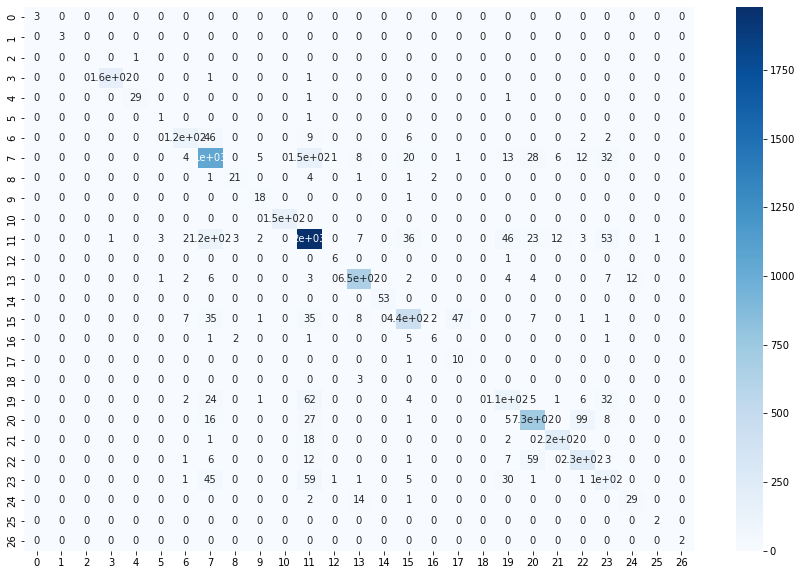

In [41]:
cf_matrix = confusion_matrix(test, pred)
plt.figure(figsize=(15,10))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

# Part 3: Topic Modelling

## 10) Using the LDA algorithm create the Topics (10) for the Corpus             (3 Marks)

In [42]:
# Let's initialise a count vectorizer to keep the count of the words in all the chapers
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(corpus)

In [43]:
# Let's print the topics and words under the topics in a tabular form
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()

    data = []
    for topic_idx, topic in enumerate(model.components_):
        data.append( ( topic_idx, " ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]) ) )

    print (tabulate(data, headers=["Topic ID", "Words in Topic"]))        

In [44]:
# let's set the # of TOPICS to be identified and the # of words under each topic to dsiplay 
TOPICS = 10
WORDS = 10

In [47]:
# Create and fit the LDA model, providing the input parameter of # of TOPICS to be identified
lda = LDA(n_components=TOPICS)
lda.fit(count_data)

LatentDirichletAllocation()

## 11) List down the 10 words in each of the Topics Extracted.           (2 Marks)


In [46]:
# Print the topics found by the LDA model
print_topics(lda, count_vectorizer, WORDS)

  Topic ID  Words in Topic
----------  ---------------------------------------------------------------------
         0  cage urged walking voices flames dancing takes climb clouds filled
         1  day sinbad said went ship time little came island like
         2  cage walking urged soldier enemy soldiers exclaimed army kept tobacco
         3  holmes said man come house think know shall way time
         4  woodcutter wife man king martin soldier sausages men tree away
         5  rabbit fox sly old little rabs hedgehog said home come
         6  cage urged walking voices flames dancing takes climb clouds filled
         7  holmes fleric said sir man room soames door table left
         8  cage urged walking voices flames dancing takes climb clouds filled
         9  cage urged walking voices flames dancing takes climb clouds filled
